In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
books = [
    "Ethical Hacking Essentials",
    "Network Security Fundamentals",
    "Cybersecurity for Beginners",
    "Advanced Penetration Testing",
    "Digital Forensics Guide",
    "Cloud Security Handbook",
    "Zero Trust Architecture",
    "Malware Analysis Techniques",
    "SOC Analyst Playbook",
    "Cryptography and Encryption"
]

authors = [
    "John Smith", "Sarah Johnson", "David Lee",
    "Michael Brown", "Emily Davis", "Robert Wilson",
    "James Taylor", "Laura White", "Daniel Clark", "Lisa Martin"
]

In [3]:
age_groups = ["18-25", "26-35", "36-45", "46-60", "60+"]
genders = ["Male", "Female", "Other"]
regions = ["UK", "USA", "Canada", "Germany", "India", "Australia"]

education_levels = [
    "Student",
    "Undergraduate",
    "Graduate",
    "Professional",
    "Doctorate"
]

In [4]:
n = 500  # number of records

data = {
    "Book_ID": np.arange(1, n+1),
    
    "Book_Title": np.random.choice(books, n),
    
    "Author": np.random.choice(authors, n),
    
    "Age_Group": np.random.choice(age_groups, n),
    
    "Gender": np.random.choice(genders, n),
    
    "Region": np.random.choice(regions, n),
    
    "Education_Level": np.random.choice(education_levels, n),
    
    "Units_Sold": np.random.randint(10, 500, n),
    
    "Price": np.random.uniform(20, 80, n).round(2),
    
    "Cost": np.random.uniform(10, 40, n).round(2)
}

df = pd.DataFrame(data)

In [5]:
# Revenue
df["Revenue"] = df["Units_Sold"] * df["Price"]

# Profit
df["Profit"] = (df["Price"] - df["Cost"]) * df["Units_Sold"]

# Profit Margin %
df["Profit_Margin_%"] = ((df["Profit"] / df["Revenue"]) * 100).round(2)

df.head()

,Book_ID,Book_Title,Author,Age_Group,Gender,Region,Education_Level,Units_Sold,Price,Cost,Revenue,Profit,Profit_Margin_%
0,1,Zero Trust Architecture,Daniel Clark,18-25,Male,UK,Graduate,402,78.29,22.35,31472.58,22487.88,71.45
1,2,Advanced Penetration Testing,John Smith,46-60,Female,Germany,Student,333,33.24,38.05,11068.92,-1601.73,-14.47
2,3,Malware Analysis Techniques,John Smith,36-45,Female,Canada,Doctorate,44,64.04,22.92,2817.76,1809.28,64.21
3,4,Digital Forensics Guide,Michael Brown,46-60,Other,Canada,Graduate,474,65.76,36.34,31170.24,13945.08,44.74
4,5,Zero Trust Architecture,Daniel Clark,46-60,Male,Germany,Undergraduate,491,75.76,28.17,37198.16,23366.69,62.82


In [6]:
df.to_csv("cybersecurity_books_sales_dataset.csv", index=False)

print("Dataset saved successfully.")

Dataset saved successfully.


In [7]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book_ID          500 non-null    int64  
 1   Book_Title       500 non-null    object 
 2   Author           500 non-null    object 
 3   Age_Group        500 non-null    object 
 4   Gender           500 non-null    object 
 5   Region           500 non-null    object 
 6   Education_Level  500 non-null    object 
 7   Units_Sold       500 non-null    int64  
 8   Price            500 non-null    float64
 9   Cost             500 non-null    float64
 10  Revenue          500 non-null    float64
 11  Profit           500 non-null    float64
 12  Profit_Margin_%  500 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 50.9+ KB


,Book_ID,Units_Sold,Price,Cost,Revenue,Profit,Profit_Margin_%
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,262.712000,50.940300,25.721980,13457.691200,6674.802500,41.374020
std,144.481833,141.438718,17.509007,8.343207,9065.307409,6907.557437,32.577062
min,1.000000,10.000000,20.030000,10.060000,424.480000,-7645.900000,-79.540000
25%,125.750000,136.000000,35.302500,19.555000,5808.685000,1314.240000,27.297500
50%,250.500000,271.000000,52.385000,26.145000,11654.110000,4808.240000,50.625000
75%,375.250000,386.250000,65.972500,32.612500,19562.010000,11090.362500,63.045000
max,500.000000,498.000000,79.970000,39.890000,37481.520000,29311.200000,87.300000


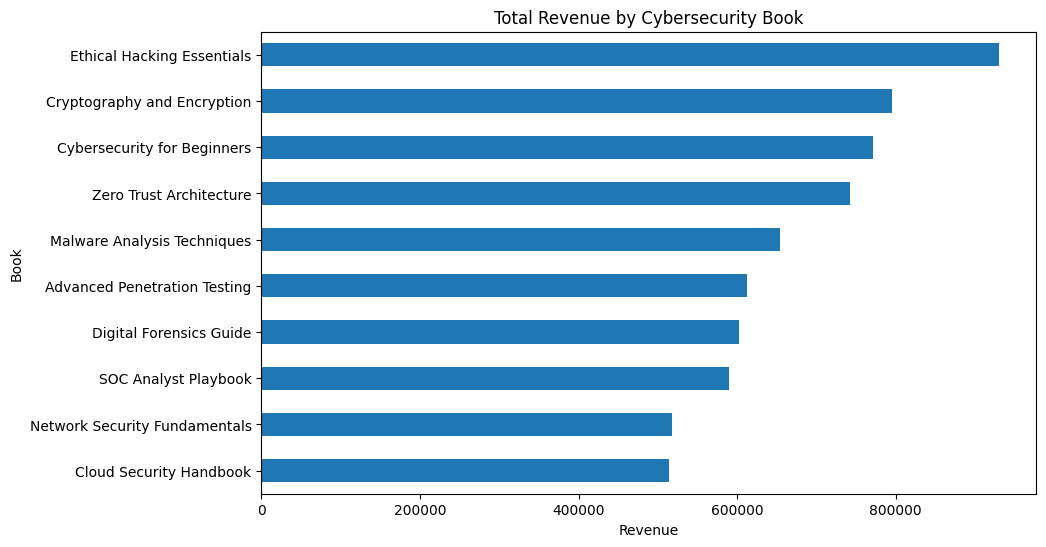

In [8]:
revenue_by_book = df.groupby("Book_Title")["Revenue"].sum().sort_values()

plt.figure(figsize=(10,6))
revenue_by_book.plot(kind="barh")

plt.title("Total Revenue by Cybersecurity Book")
plt.xlabel("Revenue")
plt.ylabel("Book")
plt.show()